# Face Recognition
---

**Project description** <br>
Design a face recognition system using the eigenface method you have learned in
class. You will be given a set of M training images and another set of test images. Use the training
images to produce a set of eigenfaces. Then recognize the face in the input image using the eigenface
method. Use Euclidean distance as distance measure for computing $d_i$ , for i = 0 to M. You can
manually choose the thresholds $T_0$ and $T_1$ that produce the best results.

What to hand in:
+ An **MS Words file** that contains your **source code** (with full comments and documentation), the **language and  compiler** used, **instructions on how to compile and run** your program, and the following: 
    - The manually chosen thresholds $T_0$ and $T_1$ , the mean face m, and the M eigenfaces. The eigenfaces are contained in the matrix U, with each column represents an eigenface. You can output each eigenface as an N $\times$ N image.
    - The PCA coefficients ($Ω_i$) for each training image. 
    - For each test image: the image after subtracting the mean face I, its PCA coefficients ($Ω_i$), the reconstructed face image ($I_R$), distances $d_i$ for i = 0 to M, and classification result (non-face, unknown face, or identify of face.)

+ **Your executable code**, the original **output image** files as described in (a) above as individual files.

<hr>
**Dataset Description:**<br>
- It consists of a set of 17 grayscale face images (in JPG format). Each image is of dimension 195 x 231 (width x height) pixels and each pixel uses 8 bits for grayscale. 
- Use the following 8 images as training images: subject01.normal, subject02.normal, subject03.normal, subject07.normal, subject10.normal, subject11.normal, subject14.normal and subject15.normal. Use all 17 images (including the 8 training images) in the dataset as test images. 
- Non-face image: A non-face image (apple1) in JPG format is attached. This image is also of dimension 195 x 231. In addition to the 17 face images,  test your algorithm on this non-face image. 

Note: In the lecture slides, the training and test images are of size N X N (same horizontal and vertical dimensions.) The face images in the above dataset have different horizontal and vertical dimensions, but the Eigenface method works the same way and with no changes to the formulas. 

In [ ]:
# Metadata
%load_ext watermark
%watermark -a "Lorenzo Piglia"
%watermark -u -n -t -z
%watermark -p numpy,matplotlib
%watermark

In [161]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

## Read Images

In [162]:
dataset_path = r'C:\Users\HW5584\git\defect_detection_challenge\data_split\train\clean'
dataset_path_test = r'C:\Users\HW5584\git\defect_detection_challenge\data_split\test\clean'
dataset_dir  = os.listdir(dataset_path)

width = 2736
height = 1824

In [163]:
from glob import glob

train_image_names = glob(dataset_path + r"\*")
test_image_names = glob(dataset_path + r"\*")

In [ ]:
from sklearn import datasets
data = datasets.fetch_olivetti_faces()

In [ ]:
training_tensor = data["data"]
height = 64
width = 64

In [166]:
print('Train Images:')
from PIL import Image
# train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
training_tensor = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = Image.open(train_image_names[i]).convert("L")
    training_tensor[i,: ] = np.array(img, dtype='float64').flatten()
#     plt.subplot(len(train_image_names)//4+1,4,1+i)
#     plt.imshow(img, cmap='gray')
#     plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
# plt.show()

print('Test Images:')


# test_image_names = dataset_dir  #[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = Image.open(test_image_names[i]).convert("L")
    testing_tensor[i,: ] = np.array(img, dtype='float64').flatten()
#     plt.subplot(len(test_image_names)//4+1,4,1+i)
#     plt.title(test_image_names[i].split('.')[0][-2:] + test_image_names[i].split('.')[1])
#     plt.imshow(img, cmap='gray')
#     plt.subplots_adjust(right=1.2, top=1.2)
#     plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
# plt.show()

Train Images:
Test Images:


## Mean face

In [ ]:
mean_face = np.mean(training_tensor, axis=0)

plt.imshow(mean_face.reshape(height, width))
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Normalised faces

In [197]:
normalised_training_tensor = np.ndarray(shape=(len(training_tensor), height*width))

for i in range(len(training_tensor)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i], mean_face)

In [ ]:
normalised_training_tensor.shape

In [ ]:
mean_face.min()

### Display normalised faces

In [169]:
for i in range(10):
    img = normalised_training_tensor[i].reshape(height, width)

    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.show()

ValueError: cannot reshape array of size 4096 into shape (1824,2736)

## Faster Method

In [196]:
normalised_training_tensor.shape

(46, 4990464)

In [198]:
# Compute the smaller covariance matrix
C = np.dot(normalised_training_tensor, normalised_training_tensor.T)  # Shape (D, D)
# Eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(C)  # Eigenvectors of T^T T

# Compute eigenfaces
eigenfaces = np.dot(normalised_training_tensor.T, eigenvectors)  # Shape (D, k) where k is the number of components

# Normalize eigenfaces if needed
eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=0)


In [175]:
eigenfaces.shape

(4990464, 46)

## Covariance matrix

In [195]:
mean_face = np.mean(training_tensor, axis=0)
X = training_tensor - mean_face

In [ ]:
X.shape

In [171]:
cov_matrix = np.cov(normalised_training_tensor, rowvar=False)
# cov_matrix = S = (1 / (400 - 1)) * (X @ X.T)
# cov_matrix = np.divide(cov_matrix, 8.0)
print('Covariance matrix of X: \n%s' %cov_matrix, "shape: ", cov_matrix.shape)

MemoryError: Unable to allocate 181. TiB for an array with shape (4990464, 4990464) and data type float64

In [ ]:
from scipy.special import softmax

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# eigenvectors_norm = softmax(eigenvectors)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

In [ ]:
# total variance
T = np.sum(eigenvalues)
print("T = {}".format(T))

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
eig_pairs = [(eigenvalues[index], eigenvectors[:, index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [ ]:
np.array(eigvectors_sort).shape

In [ ]:
def plot_eigen(k, eigenvectors):
    eigenvectors_red = eigenvectors[:, :k]
    sum = 0
    for i in range(k):
        sum += eigenvalues[i] / T
    print("Variance for k = {}: {}".format(k, sum))
    return eigenvectors_red
    # # PCA reconstruction
    # P = X @ eigenvectors_red # projection matrix
    # P = P @ eigenvectors_red.T
    # P += mean_face
    # return P

In [136]:
def display_eigenfaces(eigenfaces, i, h, w):
    plt.figure(figsize=(10, 5))
    # for i in range(eigenfaces.shape[1]):
    plt.imshow(eigenfaces[:, i].reshape(h, w), cmap='gray')
    plt.axis('off')
    plt.show()

Variance for k = 100: 0.9353531772322407


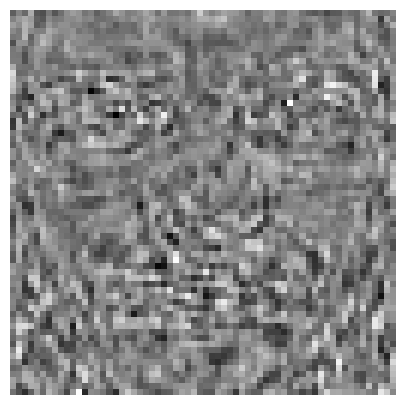

In [146]:
k = 100
face = plot_eigen(k, eigenvectors)
display_eigenfaces(eigenvectors, 370, height, width)

In [199]:
def project_onto_eigenfaces(image, mean_face, eigenfaces):
    # Flatten the image and center it
    image_flattened = image.flatten()
    centered_image = image_flattened - mean_face

    # Project onto the eigenfaces
    weights = np.dot(centered_image, eigenfaces)
    return weights

def reconstruct_face(weights, mean_face, eigenfaces):
    # Reconstruct the face from the weights
    reconstruction = mean_face + np.dot(weights, eigenfaces.T)
    return reconstruction

def display_image(image, title=''):
    plt.imshow(image.reshape(height, width), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [210]:
def reconstruct(k, image_to_reconstruct):
# Select an image to reconstruct (for example, the first image)

    display_image(image_to_reconstruct, title='Original Image')
    #
    for i in range(1, k, 5):
    # Project the image onto the eigenfaces
        weights = project_onto_eigenfaces(np.copy(image_to_reconstruct), mean_face, eigenfaces[:, :i])

        # Reconstruct the image
        reconstructed_image = reconstruct_face(weights, mean_face, eigenfaces[:, :i])

        # Display original and reconstructed images
        display_image(reconstructed_image, title=f'Reconstructed Image eith {i} eigenimages')

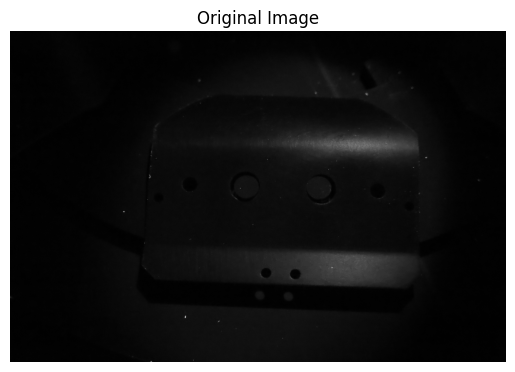

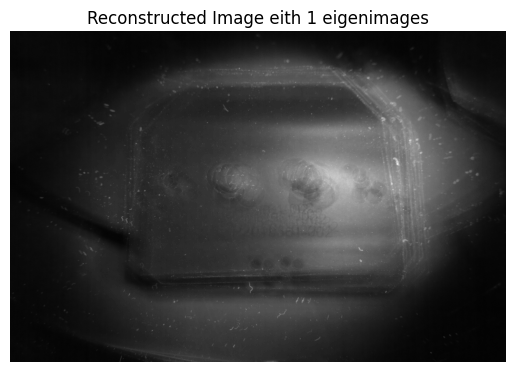

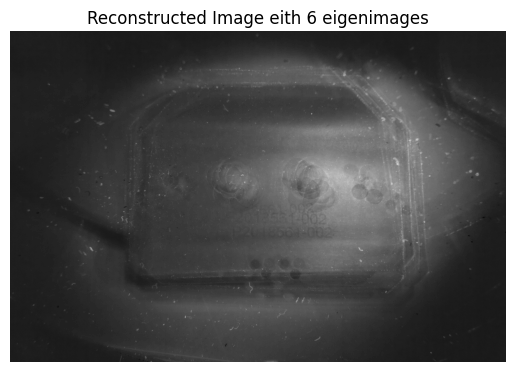

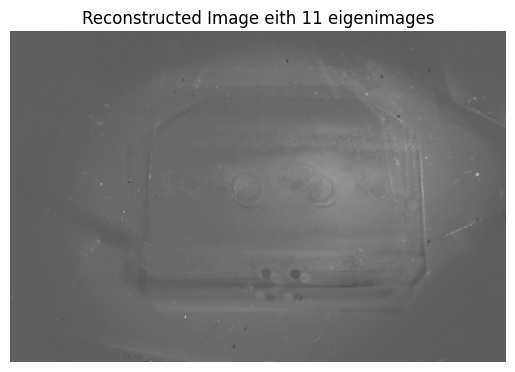

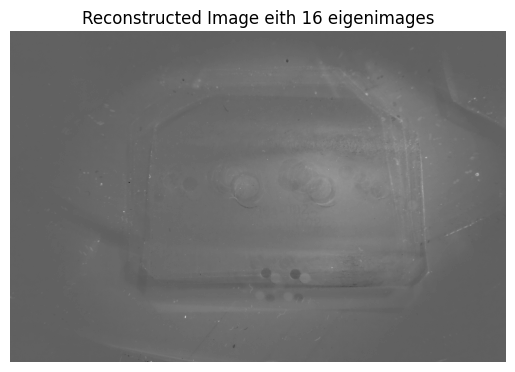

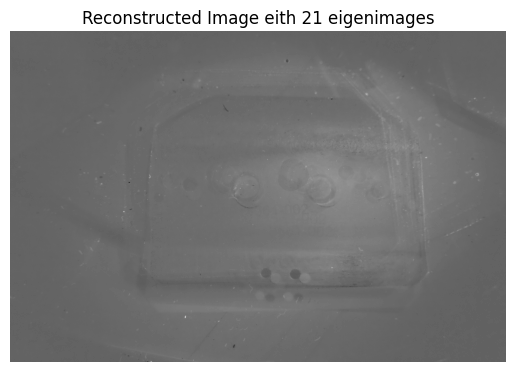

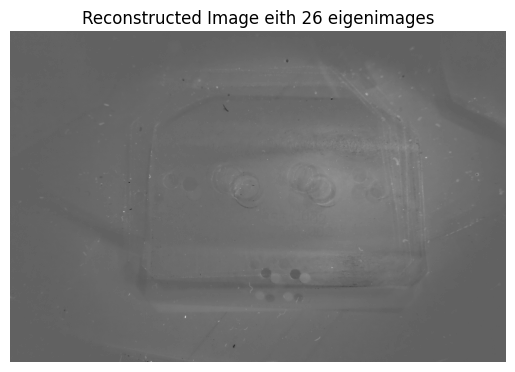

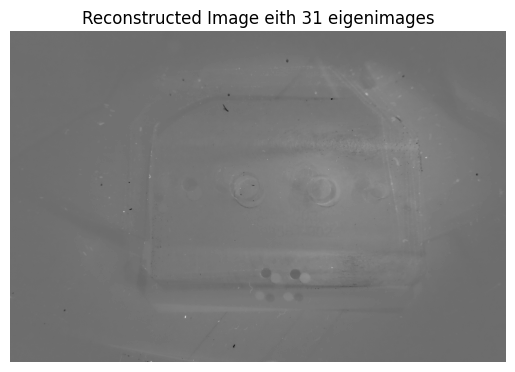

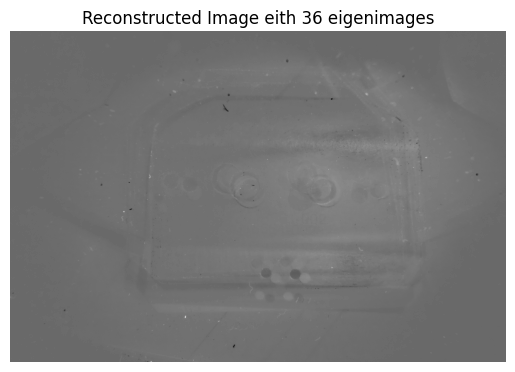

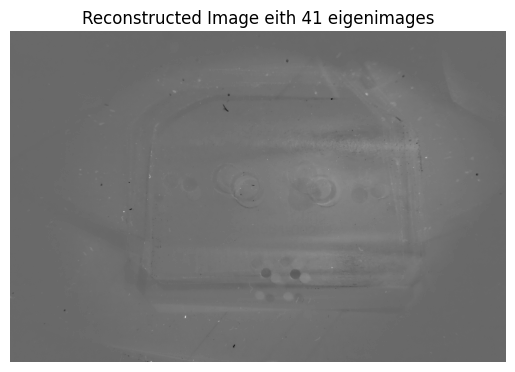

In [215]:
image_to_reconstruct = testing_tensor[10]
reconstruct(45, image_to_reconstruct)

In [ ]:
eigenvectors.shape

In [ ]:
for k in range(15):
    img = plot_eigen(k, np.array(eigvectors_sort))
    plt.imshow(img.reshape(height, width))
    plt.show()

In [ ]:
eigenfaces = np.dot(normalised_training_tensor.transpose(), np.array(eigvectors_sort))

In [ ]:
eigenfaces_norm = eigenfaces/400

In [ ]:
for i in range(5):
    plt.imshow(eigenfaces_norm[:, i].reshape(height, width))
    plt.show()

In [ ]:
plt.imshow(eigenfaces_norm[:, 305].reshape(height, width))

In [ ]:
test_img = testing_tensor[10]
test_img = normalised_training_tensor[10]

In [ ]:
print(test_img.shape)
print(eigenfaces_norm.shape)

In [ ]:
weights = np.dot(test_img, eigenfaces_norm)

In [ ]:
reconstructFace = np.mean(training_tensor, axis=0)
components = np.dot(eigenfaces_norm.T, test_img)

In [ ]:
components = components/np.linalg.norm(components)

In [ ]:
reconstructFace.max()

In [ ]:
max(eigenfaces_norm.T[0])

In [ ]:
plt.imshow(reconstructFace.reshape(height, width))
plt.show()
for i in range(len(components)):
    print(components[i])
    reconstructFace += components[i] * eigenfaces.T[i]
    plt.imshow(reconstructFace.reshape(height, width))
    plt.show()
    

In [ ]:
test_img = testing_tensor[0]

## Find cumulative variance of each principle component

In [ ]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1, len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Choose the necessary no.of principle components:

In [ ]:
eigvectors_sort = np.array(eigvectors_sort)
eigvectors_sort

In [ ]:
reduced_data = np.array(eigvectors_sort[:40]).transpose()

In [ ]:
reduced_data = eigvectors_sort.transpose()

Now we try to find the projected data. This will form the eigen space.

In [ ]:
proj_data = np.dot(training_tensor.transpose(), reduced_data)
proj_data = proj_data.transpose()

In [ ]:
proj_data

## Plot eigen faces

In [ ]:
plt.imshow(mean_face.reshape(height, width))
plt.show()
for i in range(proj_data.shape[0]):
    img = mean_face + proj_data[i]
    img = img.reshape(height, width)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off', top='off', right='off', left='off', which='both')
    plt.show()

In [ ]:
plt.imshow(testing_tensor[11].reshape(height, width))
plt.show()
plt.imshow(np.subtract(testing_tensor[11], mean_face).reshape(height, width))
plt.show()

In [ ]:
eigenimages = np.dot(eigenvectors, training_tensor)

In [ ]:
def reconstructFace(imVector, n):
  # Start with the mean / average face
  output = mean_face.reshape(height, width)
 
  for i in range(0, n):
    '''
    The weight is the dot product of the mean subtracted
    image vector with the EigenVector
    '''
    print(imVector.shape)
    print(eigenimages[i].shape)
    weight = np.dot(imVector, eigenimages[i])
    output = output + eigenimages[i].reshape(height, width) * weight
  return output

In [ ]:
eigenimages.shape

In [ ]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

In [ ]:
images=np.array([imread(image).a for image in train_image_names], dtype=np.float64)
n_samples, h, w = images.shape

In [ ]:
n_components = 50
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4) 

In [ ]:
for image in testing_tensor[:1]:
    test_normaling = np.subtract(image, mean_face)
    out = reconstructFace(test_normaling, 35)
    plt.imshow(out)

## Finding weights for each traning image

In [ ]:
w = np.array([np.dot(proj_data, i) for i in normalised_training_tensor])
w

## Now we recognise unknown face!

In [ ]:
unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalise unknown face

In [ ]:
normalised_uface_vector = np.subtract(unknown_face_vector, mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Wieghts of uknown face

Projecting the normalized vector onto the eigenspace, to find out the weights:

In [ ]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

Finding the $min|W - W_{unknown}|$

In [ ]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

## Reconizing all test images

In [ ]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread('Dataset/'+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

## Normalised images

In [ ]:
count        = 0
def recogniser(img, train_image_names,proj_data,w):
    global count
    unknown_face        = plt.imread('Dataset/'+img)
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    plt.subplot(9,4,1+count)
    plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
    plt.title('Normalised Face')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()